# EDA Feature Engineering

In this part we conduct EDA

In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
data=pd.read_csv('../dataset/processed/cleanedData.csv')
data.head(2)

,Movie_Title,Movie_ID,Budget,Cast,Crew,Studios,Genre,Keywords,Languages,Countries,Release_Data,Runtime,Gross_worldwide,Rating,Rating_Count,ListOfCertificate,Release_Year,Release_Month,Release_Day
0,Star Wars: Episode VII - The Force Awakens,2488496,245000000,"['Daisy Ridley', 'John Boyega', 'Oscar Isaac',...","['Lawrence Kasdan', 'Michael Arndt', 'J.J. Abr...","['Lucasfilm', 'Bad Robot', 'Truenorth Producti...","['Action', 'Adventure', 'Sci-Fi']","['reboot', 'sanitation employee', 'remake', 'c...",['English'],['United States'],2015-12-18,138,2069521700,7.8,893000,['PG-13'],2015,12,18
1,Frozen II,4520988,150000000,"['Kristen Bell', 'Idina Menzel', 'Josh Gad', '...","['Jennifer Lee', 'Hans Christian Andersen', 'C...","['Walt Disney Animation Studios', 'Walt Disney...","['Animation', 'Adventure', 'Comedy', 'Family',...","['autumn', 'anthropomorphic snowman', 'princes...",['English'],['United States'],2019-11-22,103,1450026933,6.8,156000,['PG'],2019,11,22


Load list fields

In [225]:
import ast
cols =['Cast', 'Genre', 'Studios', 'ListOfCertificate','Keywords', 'Languages', 'Countries','Crew']
for col in cols:
    data[col]=data[col].apply(ast.literal_eval)

In [226]:
from scipy.stats import pearsonr

## Process multivalued fields with Money and Count
1. Input
- Dataframe: Dataframe need to be process
- Name: Name of the columns we want to process. In this project they are **Cast**, **Genre** or **Studios**

2. Output
- Output: DataFrame contains information related to the columns combined with Money and Count

In [227]:
def parseWithMoneyAndCount(dataframe, colName):
    result = []
    count = []
    gross = []
    for i,record in enumerate(dataframe[colName]):
      for x in record:
        #Lưu kết quả vào mảng tương ứng
          result.append(x)
          gross.append(dataframe['Gross_worldwide'][i])
          count.append(1)
    #Tạo dataFrame
    t = pd.DataFrame({colName:result, 'Total':gross, 'Count':count})
    #Loại bỏ các giá trị trùng nhau và cộng các hàng tương ứng lại 
    result1=t.groupby(colName).sum()
    result1.reset_index(inplace=True)
    t2 = pd.DataFrame({colName:result, 'Mean':gross})
    result2=t2.groupby(colName).mean()
    result2.reset_index(inplace=True)
    final=result1.merge(result2,on=colName,how='inner')
    t3 = pd.DataFrame({colName:result, 'Median':gross})
    result3=t3.groupby(colName).median()
    result3.reset_index(inplace=True)
    final=final.merge(result3,on=colName,how='inner')
    return final

## Brief information about data



In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_Title        5568 non-null   object 
 1   Movie_ID           5568 non-null   int64  
 2   Budget             5568 non-null   int64  
 3   Cast               5568 non-null   object 
 4   Crew               5568 non-null   object 
 5   Studios            5568 non-null   object 
 6   Genre              5568 non-null   object 
 7   Keywords           5568 non-null   object 
 8   Languages          5568 non-null   object 
 9   Countries          5568 non-null   object 
 10  Release_Data       5568 non-null   object 
 11  Runtime            5568 non-null   int64  
 12  Gross_worldwide    5568 non-null   int64  
 13  Rating             5568 non-null   float64
 14  Rating_Count       5568 non-null   int64  
 15  ListOfCertificate  5568 non-null   object 
 16  Release_Year       5568 

In [229]:
data.describe()

,Movie_ID,Budget,Runtime,Gross_worldwide,Rating,Rating_Count,Release_Year,Release_Month,Release_Day
count,5.568000e+03,5.568000e+03,5568.000000,5.568000e+03,5568.000000,5.568000e+03,5568.000000,5568.000000,5568.000000
mean,9.339101e+05,3.517357e+07,108.664691,1.006549e+08,6.396408,1.137788e+05,2001.101293,6.752694,16.061422
std,1.467340e+06,4.169424e+07,18.592193,1.852684e+08,0.992371,1.869302e+05,12.175937,3.431394,8.595463
min,1.857800e+04,1.500000e+04,61.000000,2.100000e+02,1.400000,1.210000e+02,1929.000000,1.000000,1.000000
25%,1.071548e+05,1.000000e+07,96.000000,1.092104e+07,5.800000,1.600000e+04,1993.000000,4.000000,9.000000
50%,2.857825e+05,2.000000e+07,106.000000,3.498289e+07,6.500000,4.900000e+04,2003.000000,7.000000,16.000000
75%,1.197625e+06,4.225000e+07,118.000000,1.061478e+08,7.100000,1.280000e+05,2011.000000,10.000000,23.000000
max,9.844522e+06,3.560000e+08,271.000000,2.847246e+09,9.200000,2.500000e+06,2021.000000,12.000000,31.000000


## Heatmap of Correlation Matrix, Histogram and Scatter Matrix



array([[<AxesSubplot:xlabel='Budget', ylabel='Budget'>,
        <AxesSubplot:xlabel='Runtime', ylabel='Budget'>,
        <AxesSubplot:xlabel='Release_Year', ylabel='Budget'>,
        <AxesSubplot:xlabel='Gross_worldwide', ylabel='Budget'>,
        <AxesSubplot:xlabel='Rating', ylabel='Budget'>,
        <AxesSubplot:xlabel='Rating_Count', ylabel='Budget'>,
        <AxesSubplot:xlabel='Release_Month', ylabel='Budget'>],
       [<AxesSubplot:xlabel='Budget', ylabel='Runtime'>,
        <AxesSubplot:xlabel='Runtime', ylabel='Runtime'>,
        <AxesSubplot:xlabel='Release_Year', ylabel='Runtime'>,
        <AxesSubplot:xlabel='Gross_worldwide', ylabel='Runtime'>,
        <AxesSubplot:xlabel='Rating', ylabel='Runtime'>,
        <AxesSubplot:xlabel='Rating_Count', ylabel='Runtime'>,
        <AxesSubplot:xlabel='Release_Month', ylabel='Runtime'>],
       [<AxesSubplot:xlabel='Budget', ylabel='Release_Year'>,
        <AxesSubplot:xlabel='Runtime', ylabel='Release_Year'>,
        <AxesSubplot:xla

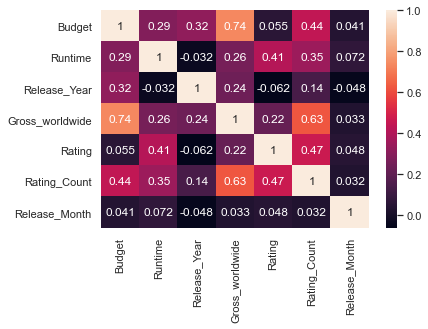

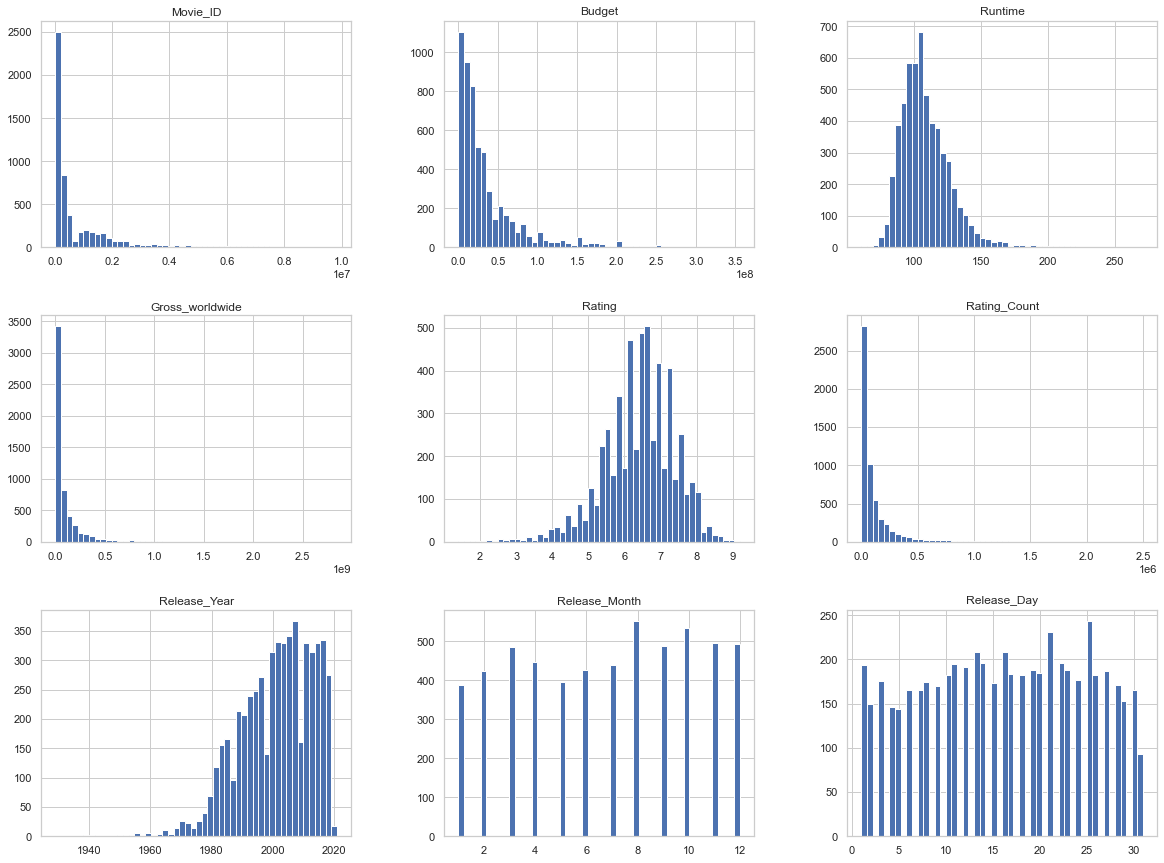

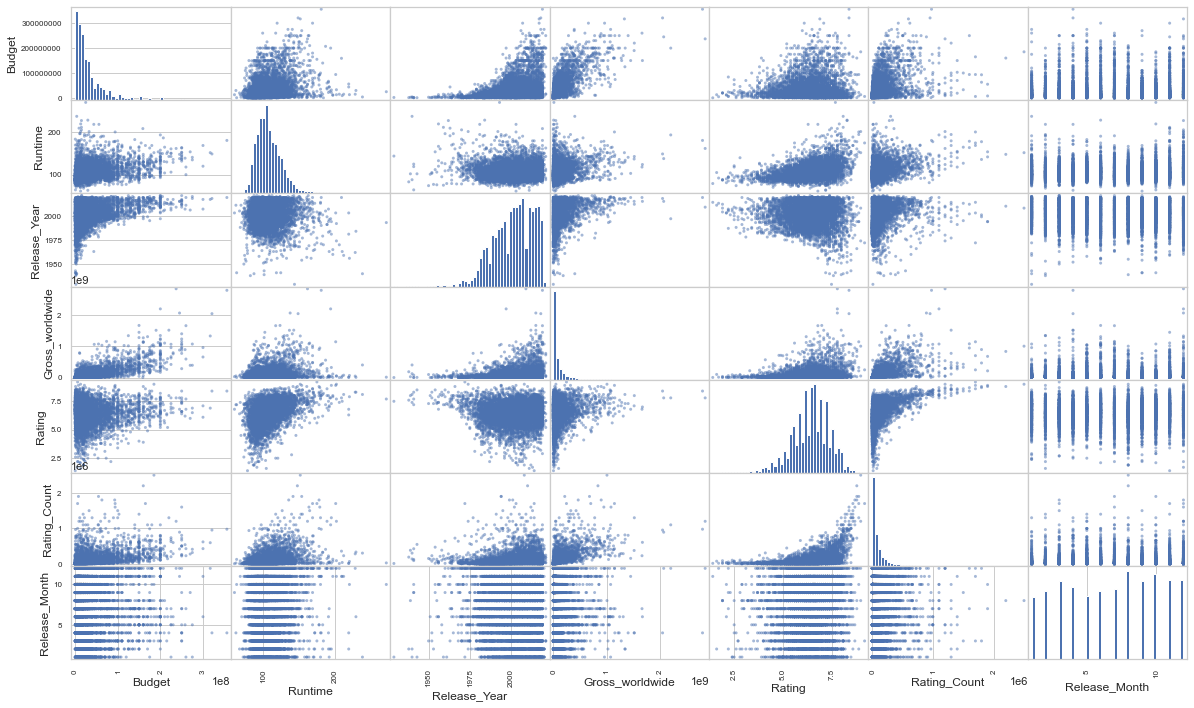

In [230]:
from pandas.plotting import scatter_matrix
cols=['Budget','Runtime','Release_Year','Gross_worldwide','Rating','Rating_Count','Release_Month']
info=data[cols]
sns.heatmap(info.corr(),annot=True)

data.hist(bins=50,figsize=(20,15))

scatter_matrix(info,figsize=(20,12),hist_kwds={'bins':50})

In [231]:
final=data.copy()

## Genre analysis

,Genre,Total,Count,Mean,Median
7,Drama,202661234532,3003,6.748626e+07,25000167.0
4,Comedy,206984038964,2268,9.126280e+07,35225875.5
20,Thriller,159883807756,1819,8.789654e+07,37034514.0
0,Action,257211396402,1551,1.658358e+08,70611210.0
17,Romance,98429498497,1397,7.045777e+07,27685016.0
1,Adventure,287126772253,1260,2.278784e+08,104145733.5
5,Crime,81562645524,1212,6.729591e+07,27199113.5
9,Fantasy,146296058095,820,1.784098e+08,73459979.5
18,Sci-Fi,149409917064,761,1.963337e+08,68777554.0
8,Family,130284457945,725,1.797027e+08,85564310.0


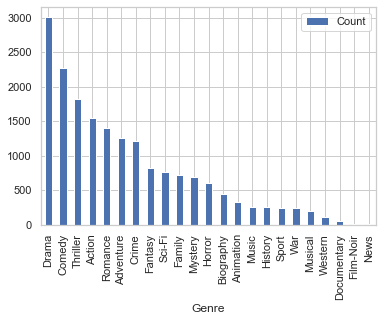

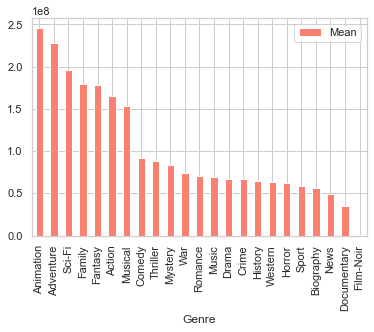

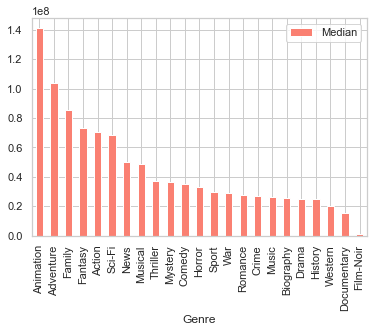

In [232]:
genre = parseWithMoneyAndCount(data,'Genre')
genre.sort_values(by='Count',ascending=False,inplace=True)
genre.plot.bar(x='Genre',y='Count')
genre.sort_values(by='Mean',ascending=False,inplace=True)
genre.plot.bar(x='Genre',y='Mean',color="salmon")
genre.sort_values(by='Median',ascending=False,inplace=True)
genre.plot.bar(x='Genre',y='Median',color="salmon")
genre.sort_values(by='Count',ascending=False)

We can see from the bar diagram that the following Genres stay at top of mean and median plot

**Animation, Adventure, Action, Sci-fi, Fantasy, Family, Animation, Musical**

Film-Noir stay at the worst position

News with only 1 records but jump from the end to top 6 of the median plot

We will develop a **Genre Rank** here base on Median but will ignore the film that have number record <10

In [233]:
genre=genre[genre['Count']>10]
genre.sort_values(by='Median',ascending=True,inplace=True)
genre.reset_index(drop=True,inplace=True)
genreRank=dict()
for i, row in enumerate(genre['Genre']):
    genreRank[row]=i
genreRank

{'Documentary': 0,
 'Western': 1,
 'History': 2,
 'Drama': 3,
 'Biography': 4,
 'Music': 5,
 'Crime': 6,
 'Romance': 7,
 'War': 8,
 'Sport': 9,
 'Horror': 10,
 'Comedy': 11,
 'Mystery': 12,
 'Thriller': 13,
 'Musical': 14,
 'Sci-Fi': 15,
 'Action': 16,
 'Fantasy': 17,
 'Family': 18,
 'Adventure': 19,
 'Animation': 20}

We we rank the genre by the highest rank of Genre in the list of Genres(Since Genre is multivalued attributes)

Pearsons correlation between GenreRank and Gross: 0.282


<AxesSubplot:xlabel='GenreRank', ylabel='Gross_worldwide'>

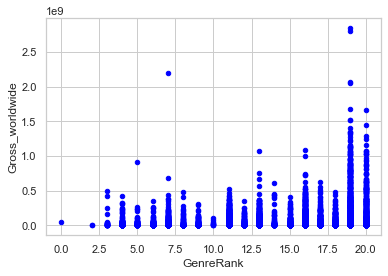

In [234]:
def getRank(listGenre):
    max=-1
    for genre in listGenre:
        if genre not in genreRank.keys():
            continue
        if genreRank[genre] > max:
            max=genreRank[genre]
    if max != -1:
        return max
    return 0
data2=data.copy()
data2['GenreRank']=data2['Genre'].apply(getRank)
corr= pearsonr(data2['GenreRank'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between GenreRank and Gross: %.3f' % corr)
data2.plot.scatter(x='GenreRank',y='Gross_worldwide',color='blue')

We we rank the genre by total rank of Genre in the list of Genres(Since Genre is multivalued attributes)

Pearsons correlation between GenreRank and Gross: 0.318


<AxesSubplot:xlabel='GenreRank', ylabel='Gross_worldwide'>

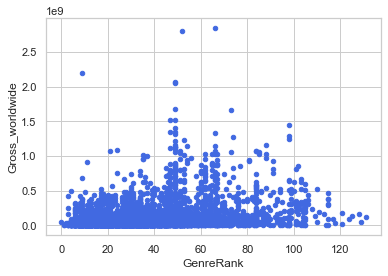

In [235]:
def getRank(listGenre):
    max=-1
    for genre in listGenre:
        if genre not in genreRank.keys():
            continue
        max+=genreRank[genre]
    if max != -1:
        return max
    return 0
data2=data.copy()
data2['GenreRank']=data2['Genre'].apply(getRank)
corr= pearsonr(data2['GenreRank'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between GenreRank and Gross: %.3f' % corr)
data2.plot.scatter(x='GenreRank',y='Gross_worldwide',color='royalblue')

We we rank the genre by average rank of Genre in the list of Genres(Since Genre is multivalued attributes)

Pearsons correlation between GenreRank and Gross: 0.351


<AxesSubplot:xlabel='GenreRank', ylabel='Gross_worldwide'>

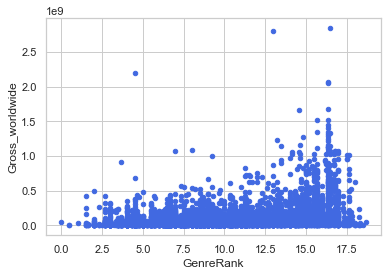

In [236]:
def getRank(listGenre):
    max=-1
    for genre in listGenre:
        if genre not in genreRank.keys():
            continue
        max+=genreRank[genre]
    if max != -1:
        return max/len(listGenre)
    return 0
data2=data.copy()
data2['GenreRank']=data2['Genre'].apply(getRank)
corr= pearsonr(data2['GenreRank'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between GenreRank and Gross: %.3f' % corr)
data2.plot.scatter(x='GenreRank',y='Gross_worldwide',color='royalblue')

In [237]:
final['GenreRank']=data2['GenreRank']

## Release_Day analysis

## Release_Month analysis


Number of release by month

<AxesSubplot:xlabel='Month'>

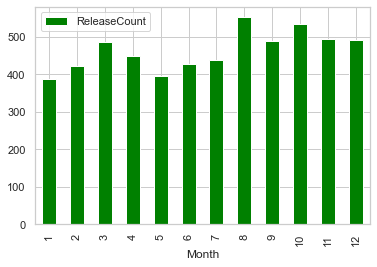

In [238]:
month=data['Release_Month'].value_counts().reset_index().sort_values(by='index',ascending=True)
month=month.rename(columns={'index':'Month','Release_Month':'ReleaseCount'})
month.plot.bar(x='Month',y='ReleaseCount',color='green')

How average gross depend on Release_Month and combine with Release_Year.

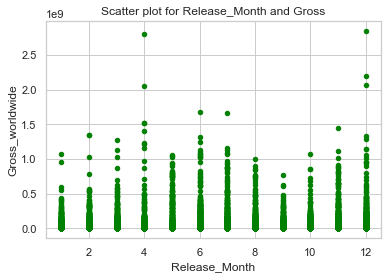

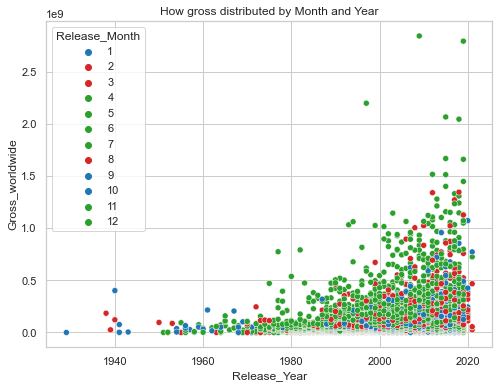

In [239]:
cols=['Release_Month','Gross_worldwide']

data.plot.scatter(x='Release_Month',y='Gross_worldwide',color='green')
plt.title("Scatter plot for Release_Month and Gross")
#3
rColor=[2,3,8] 
gColor=[4,5,6,7,11,12]
bColor=[1,9,10]
colorMap=dict()
for i in rColor:
    colorMap[i]='tab:red'
for i in gColor:
    colorMap[i]='tab:green'
for i in bColor:
    colorMap[i]='tab:blue'
C=colorMap
fig = plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Release_Year',y='Gross_worldwide',hue='Release_Month',palette=C)
plt.title("How gross distributed by Month and Year")
plt.show()

We can see that gross tends to increase by year.

In [240]:
corr= pearsonr(data2['Release_Year'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between Release_Year and Gross: %.3f' % corr)

Pearsons correlation between Release_Year and Gross: 0.240


Text(0.5, 1.0, 'Median by Month')

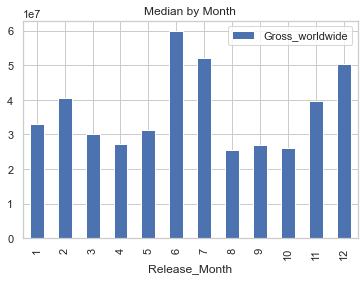

In [241]:
cols=['Release_Month','Gross_worldwide']

month=data[cols]
month=month.groupby("Release_Month").median().reset_index()
#
month.plot.bar(x='Release_Month',y='Gross_worldwide')
plt.title("Median by Month")

By Median Plot of Month and Gross. We can see that 2,6,7,11,12 is the month that are top month(We call special month)

Pearsons correlation between SpecialMonth and Gross: 0.122


<AxesSubplot:xlabel='SpecialMonth', ylabel='Gross_worldwide'>

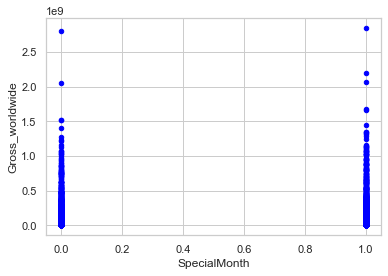

In [242]:
def getSpecialMonth(month):
    specialMonth=[2,6,7,11,12]
    if month in specialMonth:
        return 1
    else:
        return 0
data2=data.copy()
data2['SpecialMonth']=data2['Release_Month'].apply(getSpecialMonth)
corr= pearsonr(data2['SpecialMonth'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between SpecialMonth and Gross: %.3f' % corr)
data2.plot.scatter(x='SpecialMonth',y='Gross_worldwide',color='blue')

This correlation is low. We will consider by Mean instead

Text(0.5, 1.0, 'Average by Month')

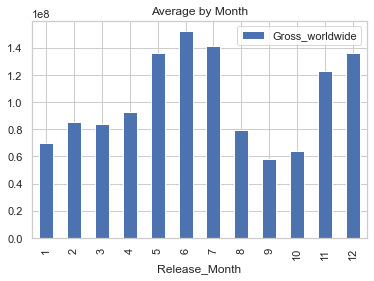

In [243]:
month=data[cols]
month=month.groupby("Release_Month").mean().reset_index()
#1
month.plot.bar(x='Release_Month',y='Gross_worldwide')
plt.title("Average by Month")

By Mean Plot of Month and Gross. We can see that 5,6,7,11,12 is the month that are top month(We call special month)

Pearsons correlation between SpecialMonth and Gross: 0.163


<AxesSubplot:xlabel='SpecialMonth', ylabel='Gross_worldwide'>

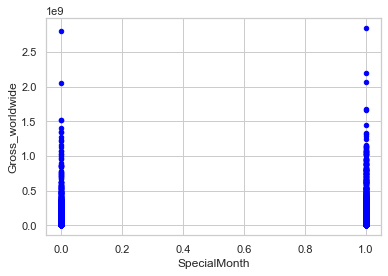

In [244]:
def getSpecialMonth(month):
    specialMonth=[5,6,7,11,12]
    if month in specialMonth:
        return 1
    else:
        return 0
data2=data.copy()
data2['SpecialMonth']=data2['Release_Month'].apply(getSpecialMonth)
corr= pearsonr(data2['SpecialMonth'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between SpecialMonth and Gross: %.3f' % corr)
data2.plot.scatter(x='SpecialMonth',y='Gross_worldwide',color='blue')

This has higher correlation so we will choose it

In [245]:
final['SpecialMonth']=data2['SpecialMonth']

## Budget analysis


In [246]:
data['Gross_worldwide'].describe()

count    5.568000e+03
mean     1.006549e+08
std      1.852684e+08
min      2.100000e+02
25%      1.092104e+07
50%      3.498289e+07
75%      1.061478e+08
max      2.847246e+09
Name: Gross_worldwide, dtype: float64

Min value is 2100 $

In [247]:
data['Budget'].describe()

count    5.568000e+03
mean     3.517357e+07
std      4.169424e+07
min      1.500000e+04
25%      1.000000e+07
50%      2.000000e+07
75%      4.225000e+07
max      3.560000e+08
Name: Budget, dtype: float64

No 0$ value Budget (Min value is 15000$)


Relation between Budget and Gross_worldwide

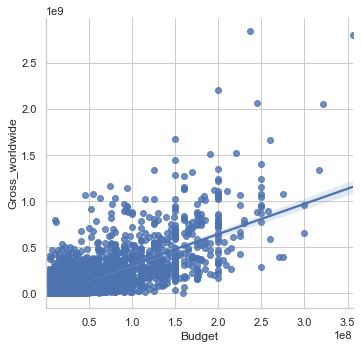

In [248]:
sns.lmplot(data=data,x='Budget',y='Gross_worldwide')

Now we will test the correlation between Budget and Gross_WorldWide 

In [249]:
corr= pearsonr(data['Budget'], data['Gross_worldwide'])[0]
print('Pearsons correlation between Budget and Gross: %.3f' % corr)

Pearsons correlation between Budget and Gross: 0.738


Budget and Gross_worldwide correlation may perform very well in our future model

## Cast Analysis



Hypothesis: Is Gross depend on number of actors showed on movie's imdb webpage?

In [250]:
data2=data.copy()
data2['numCast']=data2['Cast'].apply(lambda x: len(x))
corr= pearsonr(data2['numCast'],data2['Gross_worldwide'])[0]
data2['numCast'].value_counts()

18    5364
17      29
14      24
15      24
16      22
12      21
13      19
10      17
8       10
11       8
7        7
9        7
6        4
1        3
4        3
5        2
2        2
3        2
Name: numCast, dtype: int64

Pearsons correlation between numCast and Gross: 0.035


<AxesSubplot:xlabel='numCast', ylabel='Gross_worldwide'>

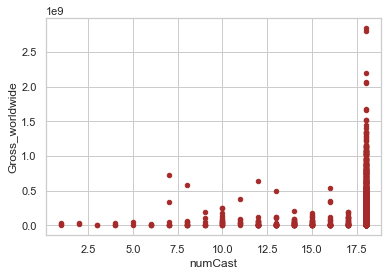

In [251]:
corr= pearsonr(data2['numCast'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between numCast and Gross: %.3f' % corr)
data2.plot.scatter(x='numCast',y='Gross_worldwide',color='brown')

->>Very low correlation

Since all imdb pages tend to have more than 17 casts per page

Cast and average gross of the movies they cast for

In [252]:
cast = parseWithMoneyAndCount(data,'Cast')
cast.sort_values(by='Count',ascending=False,inplace=True)
cast

,Cast,Total,Count,Mean,Median
39527,Samuel L. Jackson,18456068690,72,2.563343e+08,92196262.5
37779,Robert De Niro,6593726030,69,9.556125e+07,48035783.0
32400,Morgan Freeman,9946315301,56,1.776128e+08,104108909.5
5916,Bruce Willis,7162848477,55,1.302336e+08,73534117.0
33355,Nicolas Cage,5815947059,54,1.077027e+08,53635682.5
...,...,...,...,...,...
18155,Iñaki Aierra,894410,1,8.944100e+05,894410.0
18156,J. Adam Brown,62464731,1,6.246473e+07,62464731.0
18157,J. Alan Davidson,2861020,1,2.861020e+06,2861020.0
18158,J. Alan Thomas,57915972,1,5.791597e+07,57915972.0


Our data has name of 46845 casts

In [253]:
cast3Movies=cast[cast['Count']<3]
cast3Movies.sort_values(by='Median',ascending=False,inplace=True)
cast3Movies

,Cast,Total,Count,Mean,Median
19661,Jason Whyte,2847246203,1,2.847246e+09,2.847246e+09
40080,Sean Anthony Moran,2847246203,1,2.847246e+09,2.847246e+09
24721,Kelly Kilgour,2847246203,1,2.847246e+09,2.847246e+09
19064,James Patrick Pitt,2847246203,1,2.847246e+09,2.847246e+09
40174,Sean Patrick Murphy,2847246203,1,2.847246e+09,2.847246e+09
...,...,...,...,...,...
3181,Arlette Marchal,746,1,7.460000e+02,7.460000e+02
6956,Celia Lovsky,210,1,2.100000e+02,2.100000e+02
4039,Belle Mitchell,210,1,2.100000e+02,2.100000e+02
26654,Leigh Taylor-Young,210,1,2.100000e+02,2.100000e+02


38972 Casts with lower than 3 movies cast for and some people with very high Median Value

It will cause problem of not reliable rank when we try to develop a rank system is this type of fields

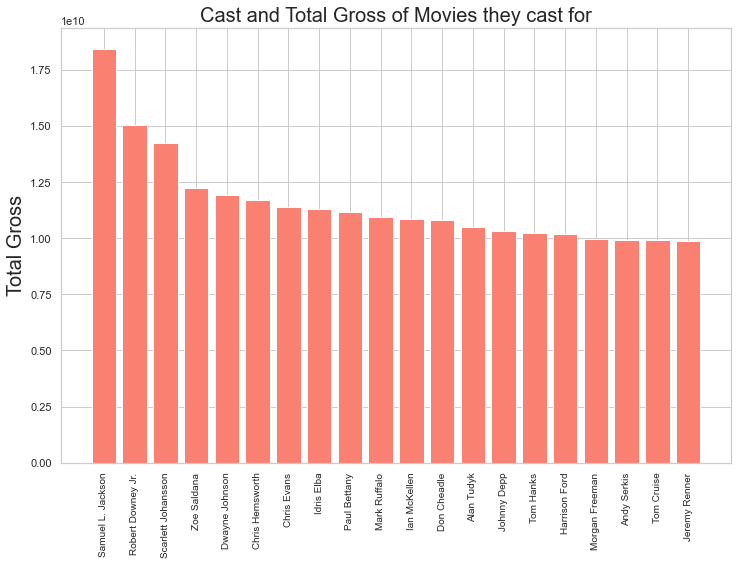

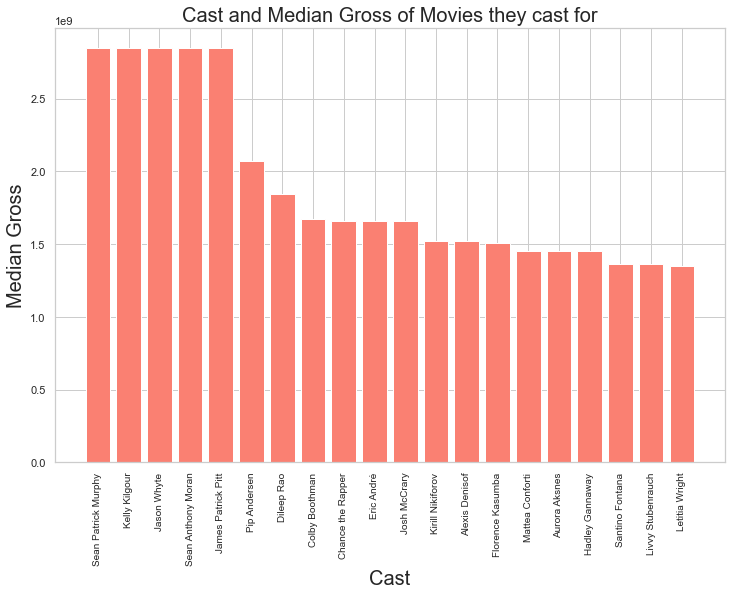

In [254]:
fig=plt.figure(figsize=(12,8))
# plt.subplot(2,1,1)
data2=cast.sort_values(by='Total',ascending=False)[0:20]
plt.bar(data=data2,x='Cast',height='Total',color="salmon")
plt.xticks(rotation=90,fontsize=10)
plt.ylabel("Total Gross",fontsize=20)
plt.title("Cast and Total Gross of Movies they cast for",fontsize=20)
fig=plt.figure(figsize=(12,8))
# plt.subplot(2,1,2)
data3=cast.sort_values(by='Mean',ascending=False)[0:20]
plt.bar(data=data3,x='Cast',height='Mean',color="salmon")
plt.xticks(rotation=90,fontsize=10)
plt.title("Cast and Average Gross of Movies they cast for",fontsize=20)
plt.xlabel("Cast",fontsize=20)
plt.ylabel("Average Gross",fontsize=20)
data3=cast.sort_values(by='Median',ascending=False)[0:20]
plt.bar(data=data3,x='Cast',height='Median',color="salmon")
plt.xticks(rotation=90,fontsize=10)
plt.title("Cast and Median Gross of Movies they cast for",fontsize=20)
plt.xlabel("Cast",fontsize=20)
plt.ylabel("Median Gross",fontsize=20)
plt.show()

Those casts name is not very well-known. **Jason Whyte** and **Sean Anthony Moran** is casts with only 1 movies attended

Now we will develop a rank system for cast (Find top leader casts)

The number of movies they cast for must larger then 5 movies

In [255]:
cast = parseWithMoneyAndCount(data,'Cast')
cast.sort_values(by='Count',ascending=False,inplace=True)
cast10Movies=cast[cast['Count']>5]
cast10Movies.sort_values(by='Mean',ascending=False,inplace=True)
cast10Movies.reset_index(drop=True,inplace=True)
cast10Movies

,Cast,Total,Count,Mean,Median
0,Rupert Grint,6809369175,7,9.727670e+08,9.344541e+08
1,Lupita Nyong'o,7278884954,8,9.098606e+08,1.020352e+09
2,Evangeline Lilly,6209206084,7,8.870294e+08,6.226741e+08
3,Daisy Ridley,5207116586,6,8.678528e+08,7.134717e+08
4,Chadwick Boseman,7668338102,9,8.520376e+08,1.506809e+08
...,...,...,...,...,...
3066,Anne Pitoniak,58415392,6,9.735899e+06,7.234928e+06
3067,Wings Hauser,57139087,6,9.523181e+06,7.778008e+06
3068,Nastassja Kinski,92076944,10,9.207694e+06,5.857329e+06
3069,Ricki Lake,38466071,6,6.411012e+06,7.246860e+06


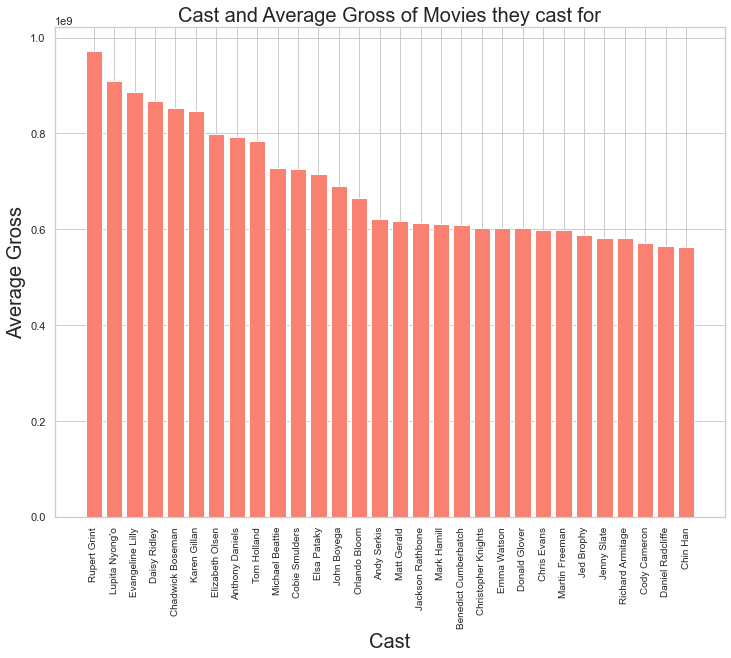

In [256]:
plt.figure(figsize=(12,9))
data3=cast10Movies.sort_values(by='Mean',ascending=False)[0:30]
plt.bar(data=data3,x='Cast',height='Mean',color="salmon")
plt.xticks(rotation=90,fontsize=10)
plt.title("Cast and Average Gross of Movies they cast for",fontsize=20)
plt.xlabel("Cast",fontsize=20)
plt.ylabel("Average Gross",fontsize=20)
plt.show()

We call them leader cast. And now move on to develop rank

In [257]:
cast10Movies.sort_values(by='Mean',ascending=True,inplace=True)
castRank=dict()
for i, row in enumerate(cast10Movies['Cast']):
    castRank[row]=i
castRank

{'Mink Stole': 0,
 'Ricki Lake': 1,
 'Nastassja Kinski': 2,
 'Wings Hauser': 3,
 'Anne Pitoniak': 4,
 'Leonard Termo': 5,
 'Steve James': 6,
 'Henry Silva': 7,
 'John P. Ryan': 8,
 'Charles Bronson': 9,
 'Meg Foster': 10,
 'Wayne Robson': 11,
 'Alberta Watson': 12,
 'Lysette Anthony': 13,
 'Clu Gulager': 14,
 'Beau Starr': 15,
 'Mariel Hemingway': 16,
 'Brent Hinkley': 17,
 'Richard Brooks': 18,
 'Daniel Baldwin': 19,
 'Leonard L. Thomas': 20,
 'Rutanya Alda': 21,
 'Philip Akin': 22,
 'Amy Madigan': 23,
 'Isabelle Huppert': 24,
 'Susan Barnes': 25,
 'Kirk Douglas': 26,
 'Vincent Spano': 27,
 'Peter Ustinov': 28,
 'Lesley Ann Warren': 29,
 'Marceline Hugot': 30,
 'John Lynch': 31,
 'Tim Thomerson': 32,
 'Richard Bradford': 33,
 'Louis Giambalvo': 34,
 'Neil Crone': 35,
 'Peter Vaughan': 36,
 'Willard E. Pugh': 37,
 "John O'Leary": 38,
 'Armin Shimerman': 39,
 'Gary Grubbs': 40,
 'Kenneth McMillan': 41,
 'Phil Fondacaro': 42,
 'Timothy Bottoms': 43,
 'Sam McMurray': 44,
 'Herbert Lom': 4

Apply to data to get CastsRank. Here we total the rank value

In [258]:
def getCastsTeamRank(casts):
    total=0
    for cast in casts:
        if cast in castRank.keys():
            total+=castRank[cast]
    return total

In [259]:
data2=data.copy()
data2['CastsRank']=data2['Cast'].apply(getCastsTeamRank)
data2['CastsRank'].value_counts()

0        185
7682       4
2400       4
3757       3
4348       3
        ... 
6061       1
525        1
17736      1
11146      1
16541      1
Name: CastsRank, Length: 4752, dtype: int64

Pearsons correlation between CastsRank and Gross: 0.575


<AxesSubplot:xlabel='CastsRank', ylabel='Gross_worldwide'>

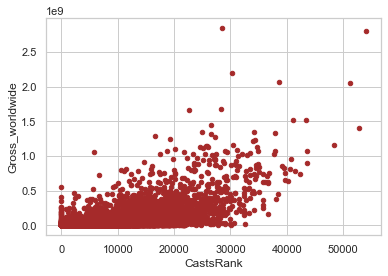

In [260]:
corr= pearsonr(data2['CastsRank'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between CastsRank and Gross: %.3f' % corr)
data2.plot.scatter(x='CastsRank',y='Gross_worldwide',color='brown')

In [261]:
final['CastsRank']=data2['CastsRank']

How about we take the rank means?

In [262]:
def getCastsTeamRank(casts):
    total=0
    for cast in casts:
        if cast in castRank.keys():
            total+=castRank[cast]
    return total/len(casts)

Pearsons correlation between CastsRank and Gross: 0.569


<AxesSubplot:xlabel='CastsRank', ylabel='Gross_worldwide'>

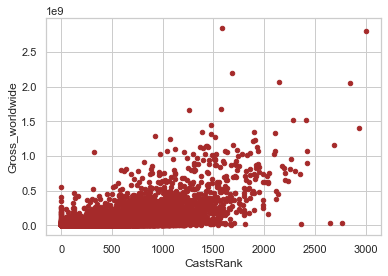

In [263]:
data2=data.copy()
data2['CastsRank']=data2['Cast'].apply(getCastsTeamRank)
data2['CastsRank'].value_counts()
corr= pearsonr(data2['CastsRank'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between CastsRank and Gross: %.3f' % corr)
data2.plot.scatter(x='CastsRank',y='Gross_worldwide',color='brown')

Both are approximately identical correlation value of **0.57**

Now we will extract more feature That is:
- Number of top lead actors(Actors that in the top **100**)
- Have lead actor in high top (In top **30**)

**NumLeadActors**

In [264]:
cast10Movies.sort_values(by='Mean',ascending=False,inplace=True)
top100Cast=list(cast10Movies['Cast'][0:100])
def getNumLeadActors(casts):
    total=0
    for cast in casts:
        if cast in top100Cast:
            total+=1
    return total
data2=data.copy()
data2['NumLeadActors']=data2['Cast'].apply(getNumLeadActors)
data2['NumLeadActors'].value_counts()


0     4877
1      501
2      103
3       41
4       18
5       12
8        6
6        4
9        2
7        2
13       1
12       1
Name: NumLeadActors, dtype: int64

Pearsons correlation between NumLeadActors and Gross: 0.612


<AxesSubplot:xlabel='NumLeadActors', ylabel='Gross_worldwide'>

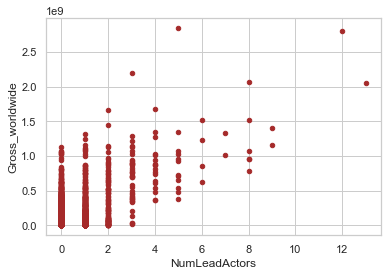

In [265]:
corr= pearsonr(data2['NumLeadActors'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between NumLeadActors and Gross: %.3f' % corr)
data2.plot.scatter(x='NumLeadActors',y='Gross_worldwide',color='brown')

In [266]:
final['NumLeadActors']=data2['NumLeadActors']

HasTop30Actors

Pearsons correlation between HasTop50Actors and Gross: 0.400


<AxesSubplot:xlabel='HasTop50Actors', ylabel='Gross_worldwide'>

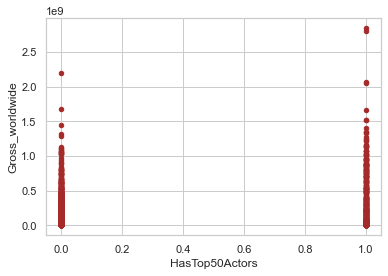

In [267]:
cast10Movies.sort_values(by='Mean',ascending=False,inplace=True)
top50Cast=list(cast10Movies['Cast'][0:50])
def getHasTop30Actors(casts):
    for cast in casts:
        if cast in top50Cast:
            return 1
    return 0
data2=data.copy()
data2['HasTop50Actors']=data2['Cast'].apply(getHasTop30Actors)
corr= pearsonr(data2['HasTop50Actors'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between HasTop50Actors and Gross: %.3f' % corr)
data2.plot.scatter(x='HasTop50Actors',y='Gross_worldwide',color='brown')

In [268]:
final['HasTop50Actors']=data2['HasTop50Actors']

## Studio Analysis

Hypothesis: Is gross depends on number of Studios participate in?

In [269]:
data2=data.copy()
data2['NumStudios']=data2['Studios'].apply(lambda x:len(x))
data2['NumStudios'].value_counts()

3    3675
2    1290
1     588
4      13
5       2
Name: NumStudios, dtype: int64

Pearsons correlation between NumStudios and Gross: 0.112


<AxesSubplot:xlabel='NumStudios', ylabel='Gross_worldwide'>

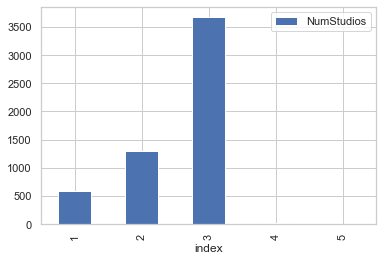

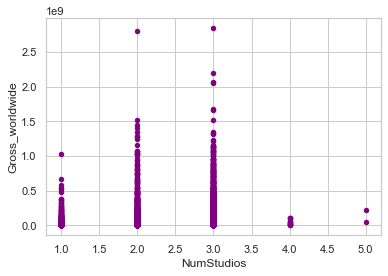

In [270]:
data2['NumStudios'].value_counts().reset_index().sort_values(by='index',ascending=True).plot.bar(x='index',y='NumStudios')
corr= pearsonr(data2['NumStudios'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between NumStudios and Gross: %.3f' % corr)
data2.plot.scatter(x='NumStudios',y='Gross_worldwide',color='purple')

In [271]:
final['NumStudios']=data2['NumStudios']

Correlation **0.112**: Not very relevant

Movies with Number of Studios Of 4 or 5 may be outlier. We will try to drop it.


In [272]:
data3=data2.drop(list(data[data2['NumStudios']==4].index),axis=0)
data3=data3.drop(list(data[data2['NumStudios']==5].index),axis=0)

Pearsons correlation between NumStudios and Gross: 0.114


<AxesSubplot:xlabel='NumStudios', ylabel='Gross_worldwide'>

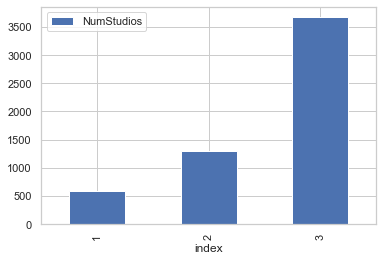

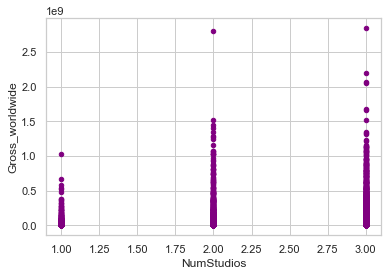

In [273]:
data3['NumStudios'].value_counts().reset_index().sort_values(by='index',ascending=True).plot.bar(x='index',y='NumStudios')
corr= pearsonr(data3['NumStudios'],data3['Gross_worldwide'])[0]
print('Pearsons correlation between NumStudios and Gross: %.3f' % corr)
data3.plot.scatter(x='NumStudios',y='Gross_worldwide',color='purple')

Correlation stay the same so we don't need to delete them

Studio and Gross of the movies they work for
* Have not devide gross to each Studio if they coop together

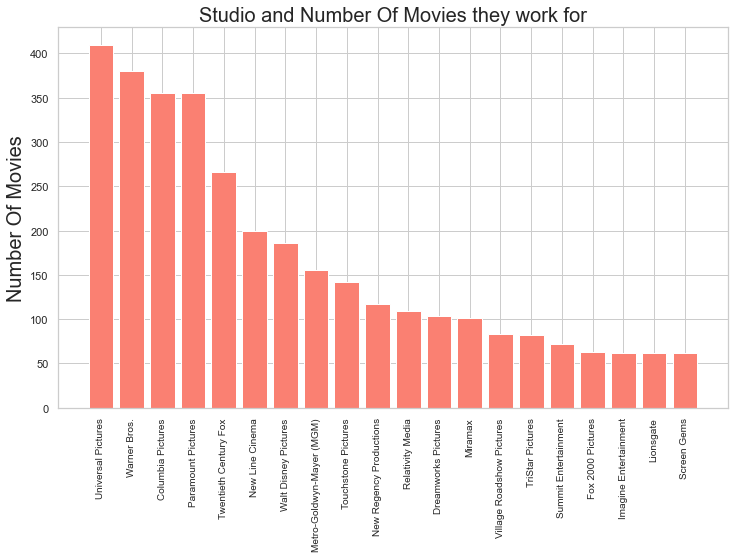

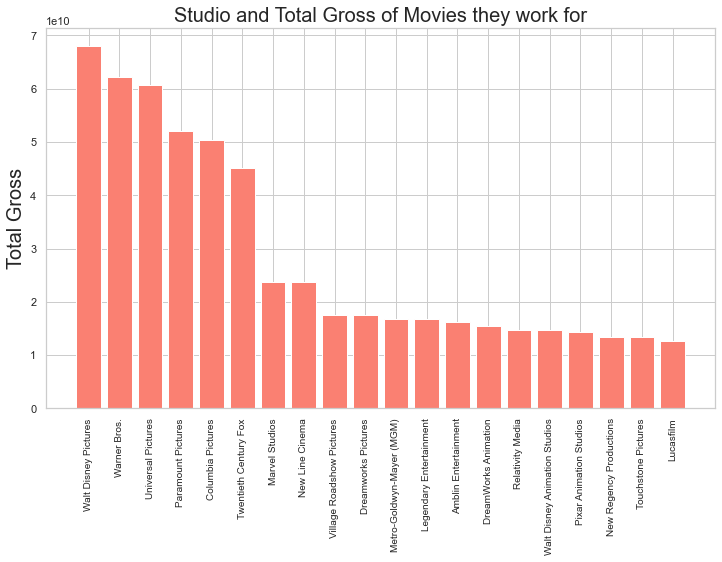

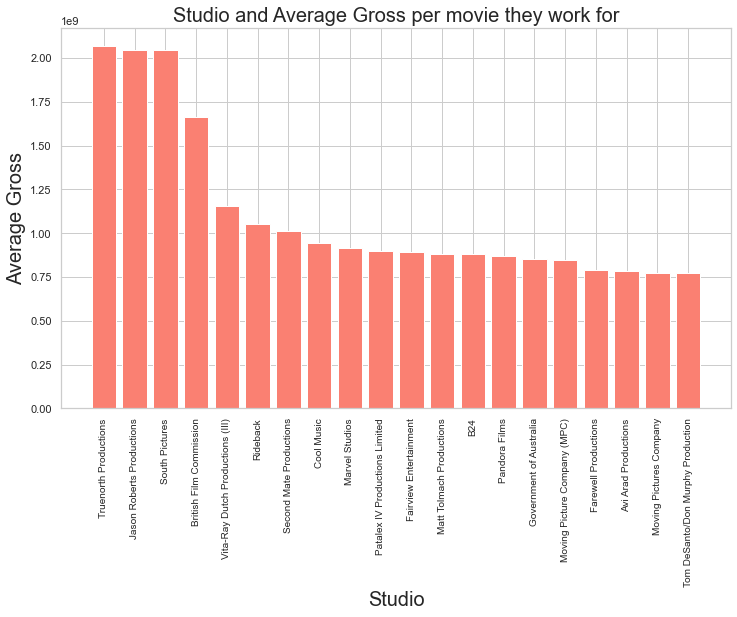

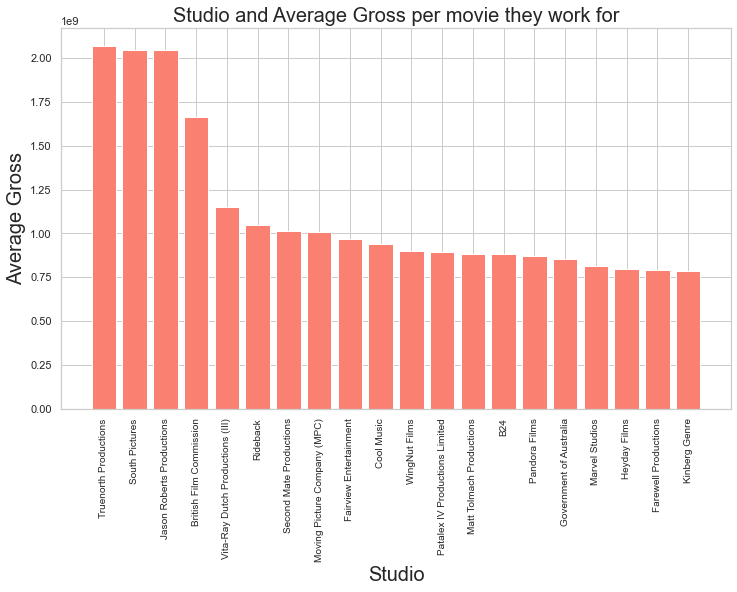

In [274]:
studio = parseWithMoneyAndCount(data,'Studios')
fig=plt.figure(figsize=(12,7))
# plt.subplot(2,1,1)
data2=studio.sort_values(by='Count',ascending=False)[0:20]
plt.bar(data=data2,x='Studios',height='Count',color="salmon")
plt.xticks(rotation=90,fontsize=10)
plt.ylabel("Number Of Movies",fontsize=20)
plt.title("Studio and Number Of Movies they work for",fontsize=20)
plt.show()

fig=plt.figure(figsize=(12,7))
# plt.subplot(2,1,1)
data2=studio.sort_values(by='Total',ascending=False)[0:20]
plt.bar(data=data2,x='Studios',height='Total',color="salmon")
plt.xticks(rotation=90,fontsize=10)
plt.ylabel("Total Gross",fontsize=20)
plt.title("Studio and Total Gross of Movies they work for",fontsize=20)
plt.show()
# plt.subplot(2,1,2)
fig=plt.figure(figsize=(12,7))
data3=studio.sort_values(by='Mean',ascending=False)[0:20]
plt.bar(data=data3,x='Studios',height='Mean',color="salmon")
plt.xticks(rotation=90,fontsize=10)
plt.title("Studio and Average Gross per movie they work for",fontsize=20)
plt.xlabel("Studio",fontsize=20)
plt.ylabel("Average Gross",fontsize=20)
plt.show()

fig=plt.figure(figsize=(12,7))
data3=studio.sort_values(by='Median',ascending=False)[0:20]
plt.bar(data=data3,x='Studios',height='Median',color="salmon")
plt.xticks(rotation=90,fontsize=10)
plt.title("Studio and Average Gross per movie they work for",fontsize=20)
plt.xlabel("Studio",fontsize=20)
plt.ylabel("Average Gross",fontsize=20)
plt.show()

In [275]:
studio.sort_values(by='Mean',ascending=False)

,Studios,Total,Count,Mean,Median
4002,Truenorth Productions,2069521700,1,2.069522e+09,2.069522e+09
2130,Jason Roberts Productions,2048359754,1,2.048360e+09,2.048360e+09
3622,South Pictures,2048359754,1,2.048360e+09,2.048360e+09
609,British Film Commission,1662899439,1,1.662899e+09,1.662899e+09
4133,Vita-Ray Dutch Productions (III),1153337496,1,1.153337e+09,1.153337e+09
...,...,...,...,...,...
959,Commonwealth Film Manufacturing,4550,1,4.550000e+03,4.550000e+03
2789,New Coast Productions,4550,1,4.550000e+03,4.550000e+03
1315,Elmer Enterprises,4534,1,4.534000e+03,4.534000e+03
4254,World Entertainment,2735,1,2.735000e+03,2.735000e+03


This average gross plot for studio is not reliable to decide which Studio is big or not since there are some Studios which participate only in one Movie

We can define big studios by 4 ways:

- Number of movies releases
- Mean gross of movies they release
- Median gross of movies they release
- Total gross of movies they release 


Now we will exclude the Studio with releases lower than 10

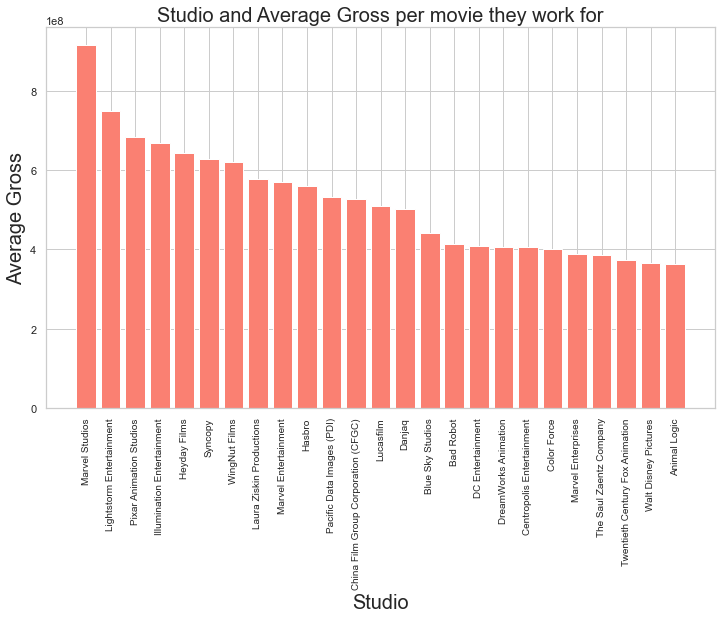

,Studios,Total,Count,Mean,Median
2561,Marvel Studios,23795322645,26,9.152047e+08,813667029.0
2379,Lightstorm Entertainment,6754939278,9,7.505488e+08,378882411.0
3104,Pixar Animation Studios,14386092278,21,6.850520e+08,623726085.0
1982,Illumination Entertainment,6693236668,10,6.693237e+08,588661184.5
1872,Heyday Films,9665995043,15,6.443997e+08,797361618.0
...,...,...,...,...,...
3284,Renaissance Films,43758422,6,7.293070e+06,3709888.5
2970,Palace Pictures,57504246,8,7.188031e+06,7768103.0
3872,The Rank Organisation,40624186,7,5.803455e+06,3560932.0
3489,Serendipity Point Films,43082702,8,5.385338e+06,3861818.5


In [276]:
studios10Larger=studio[studio['Count']>5]
studios10Larger=studios10Larger.sort_values(by='Mean',ascending=False)
fig=plt.figure(figsize=(12,7))
plt.bar(data=studios10Larger[0:25],x='Studios',height='Mean',color="salmon")
plt.xticks(rotation=90,fontsize=10)
plt.title("Studio and Average Gross per movie they work for",fontsize=20)
plt.xlabel("Studio",fontsize=20)
plt.ylabel("Average Gross",fontsize=20)
plt.show()
studios10Larger

The top studios bar chat now looks more familiar.

Move on to rank the Studios.

In [277]:
studios10Larger.sort_values(by='Mean',ascending=True,inplace=True)
studioRank=dict()
for i, row in enumerate(studios10Larger['Studios']):
    studioRank[row]=i
studioRank

{'Live Entertainment': 0,
 'Serendipity Point Films': 1,
 'The Rank Organisation': 2,
 'Palace Pictures': 3,
 'Renaissance Films': 4,
 'Fine Line Features': 5,
 'Atlantic Entertainment Group': 6,
 'Destination Films': 7,
 'New World Pictures': 8,
 'Alliance Atlantis Communications': 9,
 'Kings Road Entertainment': 10,
 'Price Entertainment': 11,
 'Worldview Entertainment': 12,
 'Golan-Globus Productions': 13,
 'Killer Films': 14,
 'De Laurentiis Entertainment Group (DEG)': 15,
 'The Samuel Goldwyn Company': 16,
 'Savoy Pictures': 17,
 'CiBy 2000': 18,
 'Recorded Picture Company (RPC)': 19,
 'Muse Productions': 20,
 'Good Machine': 21,
 'Detour Filmproduction': 22,
 'Gladden Entertainment': 23,
 'FilmFour': 24,
 'Sony Pictures Classics': 25,
 'A&M Films': 26,
 'Incorporated Television Company (ITC)': 27,
 'Cannon Films': 28,
 'ApolloMedia Distribution': 29,
 'The Cannon Group': 30,
 'Brightlight Pictures': 31,
 'Automatik Entertainment': 32,
 'Artisan Entertainment': 33,
 'Australian Fi

Apply by get the max rank in the list of Studios for each movie

The studio not appear in the list will be randomly choose rank between **0** and **200**

Pearsons correlation between StudioRank and Gross: 0.410


<AxesSubplot:xlabel='StudioRank', ylabel='Gross_worldwide'>

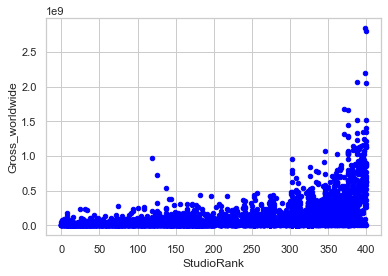

In [278]:
import random
def getStudioRank(studios):
    max=-1
    for studio in studios:
        if studio not in studioRank.keys():
            continue
        if studioRank[studio] > max:
            max=studioRank[studio]
    if max != -1:
        return max
    return random.randint(0,200)
data2=data.copy()
data2['StudioRank']=data2['Studios'].apply(getStudioRank)
corr= pearsonr(data2['StudioRank'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between StudioRank and Gross: %.3f' % corr)
data2.plot.scatter(x='StudioRank',y='Gross_worldwide',color='blue')

Apply by get the total rank in the list of Studios for each movie

The studio not appear in the list will be randomly choose rank between **0** and **200**

Pearsons correlation between StudioRank and Gross: 0.479


<AxesSubplot:xlabel='StudioRank', ylabel='Gross_worldwide'>

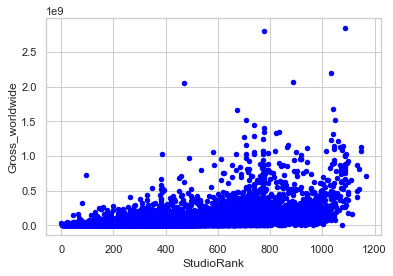

In [279]:
import random
def getStudioRank(studios):
    total=0
    for studio in studios:
        if studio not in studioRank.keys():
            total+=random.randint(0,200)
            continue
        total+=studioRank[studio]
    return total
data2=data.copy()
data2['StudioRank']=data2['Studios'].apply(getStudioRank)
corr= pearsonr(data2['StudioRank'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between StudioRank and Gross: %.3f' % corr)
data2.plot.scatter(x='StudioRank',y='Gross_worldwide',color='blue')

In [280]:
final['StudioRank']=data2['StudioRank']

Apply by get the mean rank in the list of Studios for each movie

The studio not appear in the list will be randomly choose rank between **0** and **200**

Pearsons correlation between StudioRank and Gross: 0.469


<AxesSubplot:xlabel='StudioRank', ylabel='Gross_worldwide'>

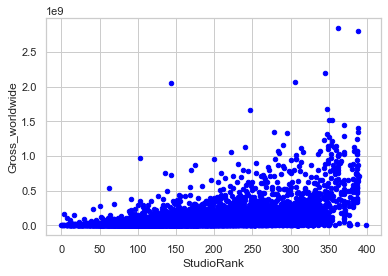

In [281]:
import random
def getStudioRank(studios):
    total=0
    for studio in studios:
        if studio not in studioRank.keys():
            total+=random.randint(0,200)
            continue
        total+=studioRank[studio]
    return total/len(studios)
data2=data.copy()
data2['StudioRank']=data2['Studios'].apply(getStudioRank)
corr= pearsonr(data2['StudioRank'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between StudioRank and Gross: %.3f' % corr)
data2.plot.scatter(x='StudioRank',y='Gross_worldwide',color='blue')

Decide to choose **total rank**

Now we will extract more feature That is:
- Number of top studios(Studio that in the top **100**)
- Boolean (0,1) Have studio in high top (In top **30**)

NumTopStudios

In [282]:
studios10Larger.sort_values(by='Mean',ascending=False,inplace=True)
top100Studios=list(studios10Larger['Studios'][0:100])
def getNumTopStudios(studios):
    total=0
    for studio in studios:
        if studio in top100Studios:
            total+=1
    return total
data2=data.copy()
data2['NumTopStudios']=data2['Studios'].apply(getNumTopStudios)
data2['NumTopStudios'].value_counts()

0    3055
1    1686
2     661
3     166
Name: NumTopStudios, dtype: int64

Pearsons correlation between NumTopStudios and Gross: 0.514


<AxesSubplot:xlabel='NumTopStudios', ylabel='Gross_worldwide'>

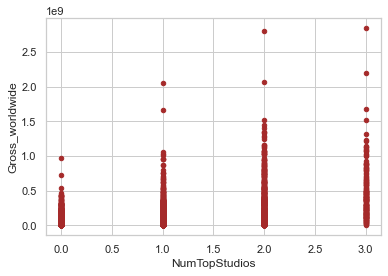

In [283]:
corr= pearsonr(data2['NumTopStudios'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between NumTopStudios and Gross: %.3f' % corr)
data2.plot.scatter(x='NumTopStudios',y='Gross_worldwide',color='brown')

In [284]:
final['NumTopStudios']=data2['NumTopStudios']

HasTopStudio

Pearsons correlation between HasTopStudio and Gross: 0.509


<AxesSubplot:xlabel='HasTopStudio', ylabel='Gross_worldwide'>

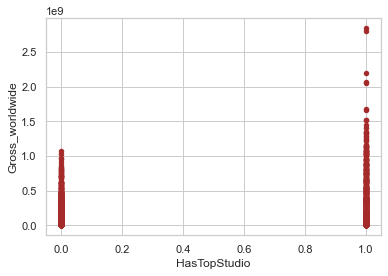

In [285]:
studios10Larger.sort_values(by='Mean',ascending=False,inplace=True)
top100Studios=list(studios10Larger['Studios'][0:30])
def getHasTopStudio(studios):
    for studio in studios:
        if studio in top100Studios:
            return 1
    return 0
data2=data.copy()
data2['HasTopStudio']=data2['Studios'].apply(getHasTopStudio)
data2['HasTopStudio'].value_counts()
corr= pearsonr(data2['HasTopStudio'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between HasTopStudio and Gross: %.3f' % corr)
data2.plot.scatter(x='HasTopStudio',y='Gross_worldwide',color='brown')

In [286]:
final['HasTopStudio']=data2['HasTopStudio']

## Production Countries Analysis



Hypothesis: Is gross depend on number of Production Companies in each movie?

In [287]:
data2=data.copy()
data2['Countries']=data2['Countries'].apply(lambda x: len(x))
data2['Countries'].value_counts()

1     3435
2     1308
3      485
4      204
5       88
6       28
8        8
7        7
9        2
11       2
19       1
Name: Countries, dtype: int64

Pearsons correlation between Countries and Gross: 0.079


<AxesSubplot:xlabel='Countries', ylabel='Gross_worldwide'>

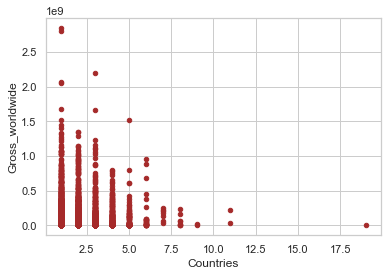

In [288]:
corr= pearsonr(data2['Countries'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between Countries and Gross: %.3f' % corr)
data2.plot.scatter(x='Countries',y='Gross_worldwide',color='brown')

Very low correlation of **0.079**

Gross of each countries and Total Gross
* Have not devide gross to each Country if they coop together

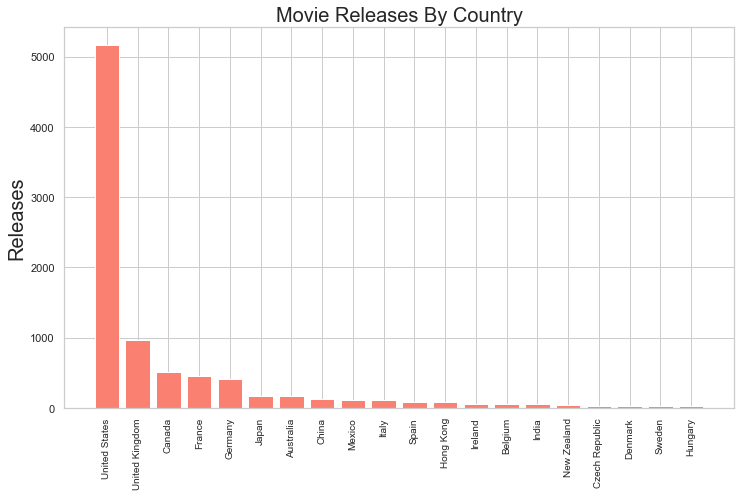

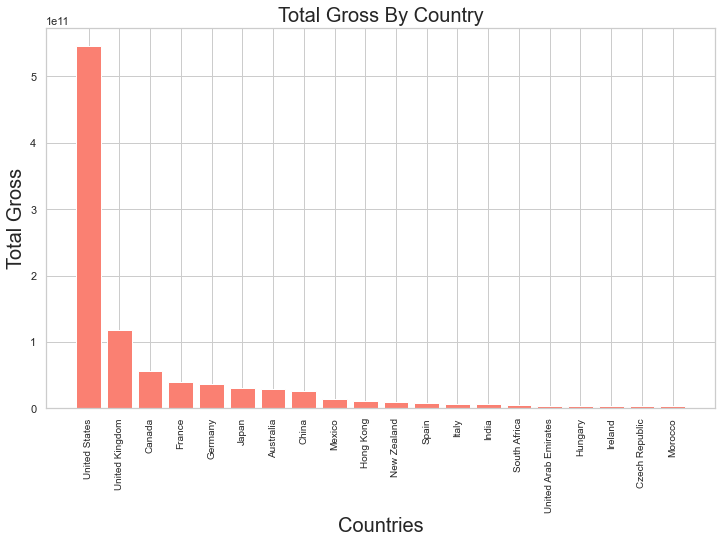

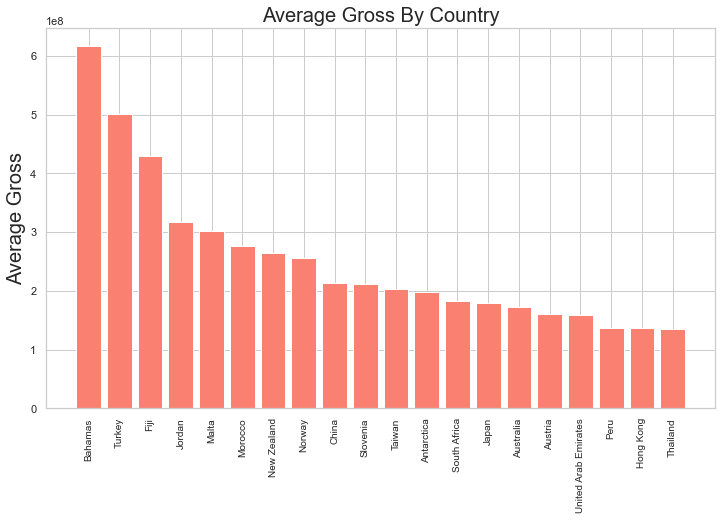

In [289]:
country = parseWithMoneyAndCount(data,'Countries')
# country=country[country['Count']>20]
fig=plt.figure(figsize=(12,7))
# plt.subplot(2,1,1)
data2=country.sort_values(by='Count',ascending=False)[0:20]
plt.bar(data=data2,x='Countries',height='Count',color="salmon")
plt.xticks(rotation=90,fontsize=10)
plt.ylabel("Releases",fontsize=20)
plt.title("Movie Releases By Country",fontsize=20)
fig=plt.figure(figsize=(12,7))
# plt.subplot(2,1,2)
data2=country.sort_values(by='Total',ascending=False)[0:20]
plt.bar(data=data2,x='Countries',height='Total',color="salmon")
plt.ylabel("Total Gross",fontsize=20)
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Countries",fontsize=20)
plt.title("Total Gross By Country",fontsize=20)


fig=plt.figure(figsize=(12,7))
# plt.subplot(2,1,1)
data2=country.sort_values(by='Mean',ascending=False)[0:20]
plt.bar(data=data2,x='Countries',height='Mean',color="salmon")
plt.xticks(rotation=90,fontsize=10)
plt.ylabel("Average Gross",fontsize=20)
plt.title("Average Gross By Country",fontsize=20)
plt.show()
## This use for QUESTION 8
list_country=list(country['Countries'])

This rank of average gross is not relevant since there are some countries with only least release count

In [290]:
country.sort_values(by='Mean',ascending=False)

,Countries,Total,Count,Mean,Median
6,Bahamas,616502912,1,6.165029e+08,616502912.0
84,Turkey,1502698621,3,5.008995e+08,376152455.0
26,Fiji,429632142,1,4.296321e+08,429632142.0
44,Jordan,634588892,2,3.172944e+08,317294446.0
52,Malta,3018772088,10,3.018772e+08,296745968.5
...,...,...,...,...,...
56,Namibia,8618884,2,4.309442e+06,4309442.0
0,Afghanistan,3910519,1,3.910519e+06,3910519.0
19,Cyprus,3666236,1,3.666236e+06,3666236.0
60,Occupied Palestinian Territory,3579902,1,3.579902e+06,3579902.0


<AxesSubplot:xlabel='Countries'>

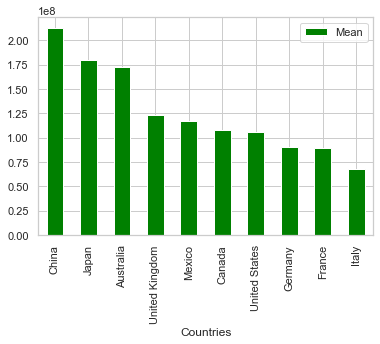

In [291]:
country.sort_values(by='Mean',ascending=False)
release100Countries=country[country['Count']>= 100]
release100Countries=release100Countries.sort_values(by='Mean',ascending=False)
release100Countries.plot.bar(x='Countries',y='Mean',color='green')

We will choose these list of Countries to extract a rank feature

In [292]:
release100Countries=release100Countries.sort_values(by='Mean',ascending=True).reset_index(drop=True)
countryRank=dict()
for i, row in enumerate(release100Countries['Countries']):
    countryRank[row]=i+1 ## Plus 1 in order to release the 0 position for another film
countryRank

{'Italy': 1,
 'France': 2,
 'Germany': 3,
 'United States': 4,
 'Canada': 5,
 'Mexico': 6,
 'United Kingdom': 7,
 'Australia': 8,
 'Japan': 9,
 'China': 10}

Get rank by the maximum

Pearsons correlation between CountryRank and Gross: 0.134


<AxesSubplot:xlabel='CountryRank', ylabel='Gross_worldwide'>

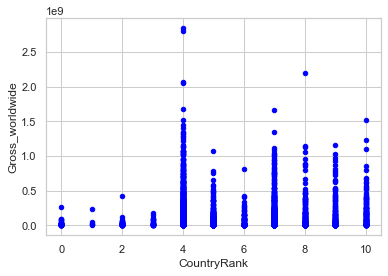

In [293]:
def getCountryRank(countries):
    max=0
    for country in countries:
        if country not in countryRank.keys():
            continue
        if countryRank[country]>max:
            max=countryRank[country]
    return max
data2=data.copy()
data2['CountryRank']=data2['Countries'].apply(getCountryRank)
corr= pearsonr(data2['CountryRank'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between CountryRank and Gross: %.3f' % corr)
data2.plot.scatter(x='CountryRank',y='Gross_worldwide',color='blue')

In [294]:
final['CountryRank']=data2['CountryRank']

By total

Pearsons correlation between CountryRank and Gross: 0.133


<AxesSubplot:xlabel='CountryRank', ylabel='Gross_worldwide'>

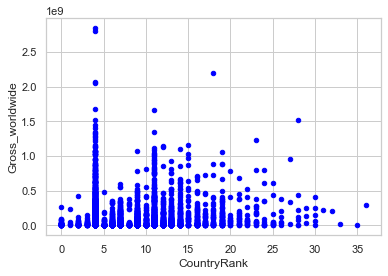

In [295]:
def getCountryRank(countries):
    total=0
    for country in countries:
        if country not in countryRank.keys():
            continue
        total+=countryRank[country]
    return total
data2=data.copy()
data2['CountryRank']=data2['Countries'].apply(getCountryRank)
corr= pearsonr(data2['CountryRank'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between CountryRank and Gross: %.3f' % corr)
data2.plot.scatter(x='CountryRank',y='Gross_worldwide',color='blue')

By in the list

Pearsons correlation between CountryRank and Gross: 0.032


<AxesSubplot:xlabel='CountryRank', ylabel='Gross_worldwide'>

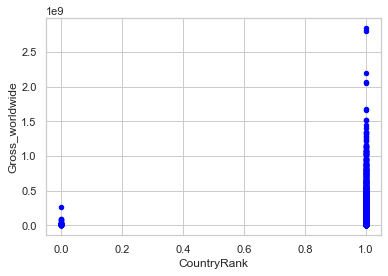

In [296]:
def getCountryRank(countries):
    for country in countries:
        if country not in countryRank.keys():
            continue
        return 1
    return 0
data2=data.copy()
data2['CountryRank']=data2['Countries'].apply(getCountryRank)
corr= pearsonr(data2['CountryRank'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between CountryRank and Gross: %.3f' % corr)
data2.plot.scatter(x='CountryRank',y='Gross_worldwide',color='blue')

## Language analysis


How distribution release by Languague

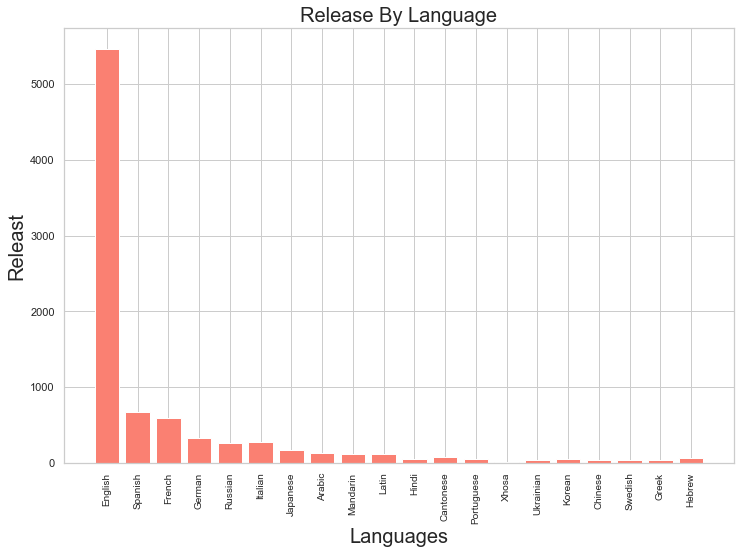

In [297]:
language=parseWithMoneyAndCount(data,'Languages')
data2=language.sort_values(by='Total',ascending=False)[0:20]

fig=plt.figure(figsize=(12,8))
plt.bar(data=data2,x='Languages',height='Count',color="salmon")
plt.ylabel("Releast",fontsize=20)
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Languages",fontsize=20)
plt.title("Release By Language",fontsize=20)
plt.show()

Nowadays, films almost have English. We will try to find that what is the film is spoken in English or another languages

In [298]:
data2=data.copy()
data2['IsEnnglish']=data2['Languages'].apply(lambda x: 1 if 'English' in x else 0)
data2['IsEnnglish'].value_counts()

1    5469
0      99
Name: IsEnnglish, dtype: int64

Pearsons correlation between IsEnnglish and Gross: 0.037


<AxesSubplot:xlabel='IsEnnglish', ylabel='Gross_worldwide'>

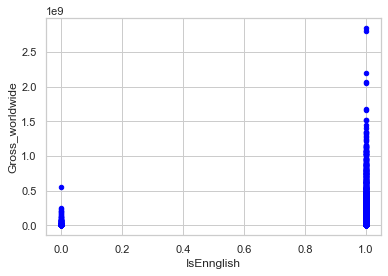

In [299]:
corr= pearsonr(data2['IsEnnglish'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between IsEnnglish and Gross: %.3f' % corr)
data2.plot.scatter(x='IsEnnglish',y='Gross_worldwide',color='blue')

Not very relevant with correlation of 0.037

In [300]:
lan100Releases=language[language['Count']>100]
lan100Releases.sort_values(by='Median',ascending=False)

,Languages,Total,Count,Mean,Median
81,Mandarin,20747959269,114,1.819996e+08,133986774.5
66,Japanese,28320880081,168,1.685767e+08,75501090.0
10,Arabic,21871109579,134,1.632172e+08,74227405.5
114,Russian,39897960562,260,1.534537e+08,69979422.5
48,German,41831667851,322,1.299120e+08,53052363.0
65,Italian,35270762768,280,1.259670e+08,48921987.0
130,Spanish,85951294785,674,1.275242e+08,48605359.0
44,French,75246723820,585,1.286269e+08,47817020.0
74,Latin,17305063573,112,1.545095e+08,47374296.0
38,English,555468476874,5469,1.015667e+08,35348597.0


In [301]:
lan100Releases=lan100Releases.sort_values(by='Median',ascending=True).reset_index(drop=True)
languageRank=dict()
for i, row in enumerate(lan100Releases['Languages']):
    languageRank[row]=i+1 ## Plus 1 in order to release the 0 position for another film
languageRank

{'English': 1,
 'Latin': 2,
 'French': 3,
 'Spanish': 4,
 'Italian': 5,
 'German': 6,
 'Russian': 7,
 'Arabic': 8,
 'Japanese': 9,
 'Mandarin': 10}

Pearsons correlation between LanguageRank and Gross: 0.122


<AxesSubplot:xlabel='LanguageRank', ylabel='Gross_worldwide'>

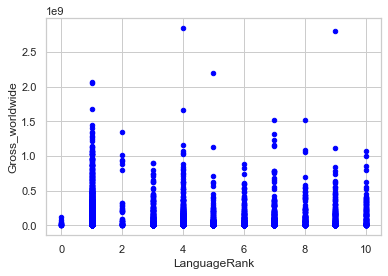

In [302]:
def getLanguageRank(languages):
    max=0
    for language in languages:
        if language not in languageRank.keys():
            continue
        if languageRank[language]>max:
            max=languageRank[language]
    return max
data2=data.copy()
data2['LanguageRank']=data2['Languages'].apply(getLanguageRank)
corr= pearsonr(data2['LanguageRank'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between LanguageRank and Gross: %.3f' % corr)
data2.plot.scatter(x='LanguageRank',y='Gross_worldwide',color='blue')

In [303]:
final['LanguageRank']=data2['LanguageRank']

## Keywords analysis

Hypothesis: Is gross depend on number of keywords?

In [304]:
data2=data.copy()
data2['NumKeywords']=data2['Keywords'].apply(lambda x: len(x))
data2['NumKeywords'].value_counts()

5    5542
2       8
1       8
4       5
3       5
Name: NumKeywords, dtype: int64

Pearsons correlation between NumKeywords and Gross: 0.031


<AxesSubplot:xlabel='NumKeywords', ylabel='Gross_worldwide'>

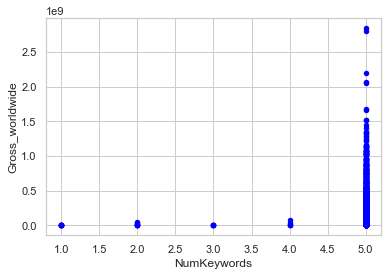

In [305]:
corr= pearsonr(data2['NumKeywords'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between NumKeywords and Gross: %.3f' % corr)
data2.plot.scatter(x='NumKeywords',y='Gross_worldwide',color='blue')

Not relevant

How distribution of gross by Keywords

Text(0, 0.5, 'Count')

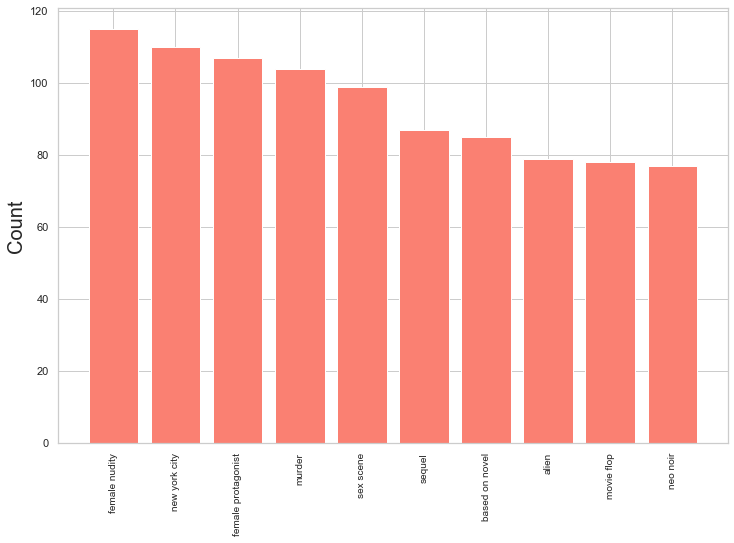

In [306]:
keyword=parseWithMoneyAndCount(data,'Keywords')
fig=plt.figure(figsize=(12,8))
data2=keyword.sort_values(by='Count',ascending=False)[0:10]
plt.bar(data=data2,x='Keywords',height='Count',color="salmon")
plt.xticks(rotation=90,fontsize=10)
plt.ylabel("Count",fontsize=20)

In [307]:
keyword.sort_values(by='Mean',ascending=False)[0:10]

,Keywords,Total,Count,Mean,Median
3620,forest protection,2847246203,1,2.847246e+09,2.847246e+09
2177,cosmic,2797501328,1,2.797501e+09,2.797501e+09
5320,love affair,2201647264,1,2.201647e+09,2.201647e+09
7866,sailor's death,2201647264,1,2.201647e+09,2.201647e+09
8872,sunken ship,2201647264,1,2.201647e+09,2.201647e+09
7899,sanitation employee,2069521700,1,2.069522e+09,2.069522e+09
2475,death of recurring character,2048359754,1,2.048360e+09,2.048360e+09
7838,s.h.i.e.l.d.,1518815515,1,1.518816e+09,1.518816e+09
1558,car falling off a cliff,1515341399,1,1.515341e+09,1.515341e+09
451,anthropomorphic snowman,1450026933,1,1.450027e+09,1.450027e+09


In [308]:
keyword.sort_values(by='Median',ascending=False)[0:10]

,Keywords,Total,Count,Mean,Median
3620,forest protection,2847246203,1,2.847246e+09,2.847246e+09
2177,cosmic,2797501328,1,2.797501e+09,2.797501e+09
7866,sailor's death,2201647264,1,2.201647e+09,2.201647e+09
5320,love affair,2201647264,1,2.201647e+09,2.201647e+09
8872,sunken ship,2201647264,1,2.201647e+09,2.201647e+09
7899,sanitation employee,2069521700,1,2.069522e+09,2.069522e+09
2475,death of recurring character,2048359754,1,2.048360e+09,2.048360e+09
7838,s.h.i.e.l.d.,1518815515,1,1.518816e+09,1.518816e+09
1558,car falling off a cliff,1515341399,1,1.515341e+09,1.515341e+09
451,anthropomorphic snowman,1450026933,1,1.450027e+09,1.450027e+09


These keywords have high mean and median except the truth that have only 1 count

In [309]:
count50Keywords=keyword[keyword['Count']>20]
count50Keywords.sort_values(by='Mean',ascending=False)

,Keywords,Total,Count,Mean,Median
8883,superhero,31475839418,56,5.620686e+08,392585144.5
837,based on comic book,10165398928,21,4.840666e+08,370569774.0
5379,magic,9707897756,31,3.131580e+08,115121981.0
4976,king,7729546059,26,2.972902e+08,64916530.0
8094,sequel,25020374178,87,2.875905e+08,147792047.0
...,...,...,...,...,...
202,african american,1274674362,50,2.549349e+07,18467603.0
5132,lesbian,553862901,22,2.517559e+07,9008302.0
7941,scene during opening credits,587015908,24,2.445900e+07,11714632.0
6411,one word title,906742016,38,2.386163e+07,8753583.0


<AxesSubplot:xlabel='Keywords'>

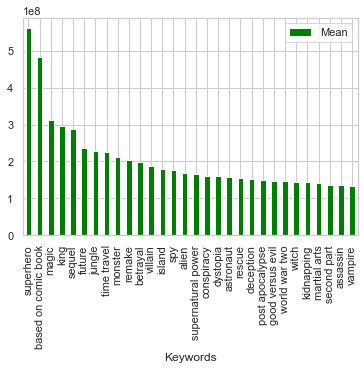

In [310]:
count50Keywords.sort_values(by='Mean',ascending=False)[0:30].plot.bar(x='Keywords',y='Mean',color='green')

**superhero** keywords is popular in the 2010s and have high average gross

Rank keywords

In [311]:
count50Keywords=count50Keywords.sort_values(by='Mean',ascending=True).reset_index(drop=True)
keywordRank=dict()
for i, row in enumerate(count50Keywords['Keywords']):
    keywordRank[row]=i+1 ## Plus 1 in order to release the 0 position for another film
keywordRank

{'timeframe 1990s': 1,
 'one word title': 2,
 'scene during opening credits': 3,
 'lesbian': 4,
 'african american': 5,
 'female frontal nudity': 6,
 'bare breasts': 7,
 'infidelity': 8,
 'breasts': 9,
 'slasher': 10,
 'vietnam war veteran': 11,
 'panties': 12,
 'bare chested male': 13,
 '1950s': 14,
 'movie flop': 15,
 'title directed by female': 16,
 'surrealism': 17,
 'watching tv': 18,
 'male frontal nudity': 19,
 'police officer': 20,
 'fbi federal bureau of investigation': 21,
 'teenage boy': 22,
 'two word title': 23,
 'neo noir': 24,
 'baseball': 25,
 'boy': 26,
 'nudity': 27,
 'gay': 28,
 'small town': 29,
 'money': 30,
 'f rated': 31,
 '1960s': 32,
 '1930s': 33,
 'satire': 34,
 'character name as title': 35,
 'teenage girl': 36,
 'hospital': 37,
 'writer': 38,
 'road movie': 39,
 'black comedy': 40,
 'adultery': 41,
 'voyeur': 42,
 'automobile': 43,
 'cult film': 44,
 'rape': 45,
 'church': 46,
 'marriage': 47,
 'suicide': 48,
 'love': 49,
 'male nudity': 50,
 'sex': 51,
 'fe

Get rank for keywords by maximum

Default max rank = 0

Pearsons correlation between keywordRank and Gross: 0.130


<AxesSubplot:xlabel='keywordRank', ylabel='Gross_worldwide'>

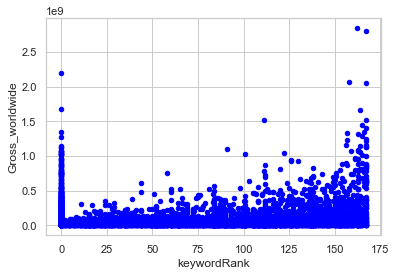

In [312]:
import random
def getKeywordsRank(keywords):
    max=0
    for keyword in keywords:
        if keyword not in keywordRank.keys():
            continue
        if keywordRank[keyword]>max:
            max=keywordRank[keyword]
    return max
data2=data.copy()
data2['keywordRank']=data2['Keywords'].apply(getKeywordsRank)
corr= pearsonr(data2['keywordRank'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between keywordRank and Gross: %.3f' % corr)
data2.plot.scatter(x='keywordRank',y='Gross_worldwide',color='blue')

In [313]:
final['keywordRank']=data2['keywordRank']

## MPAA Analysis

How distribution of gross by MPAA Certificate

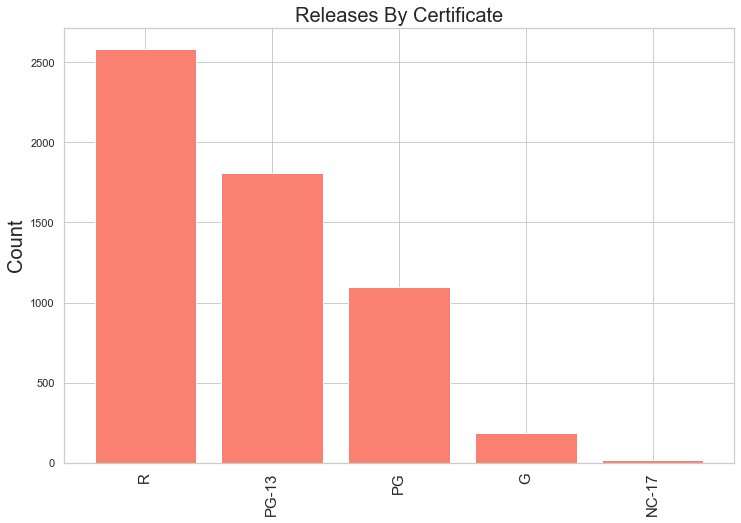

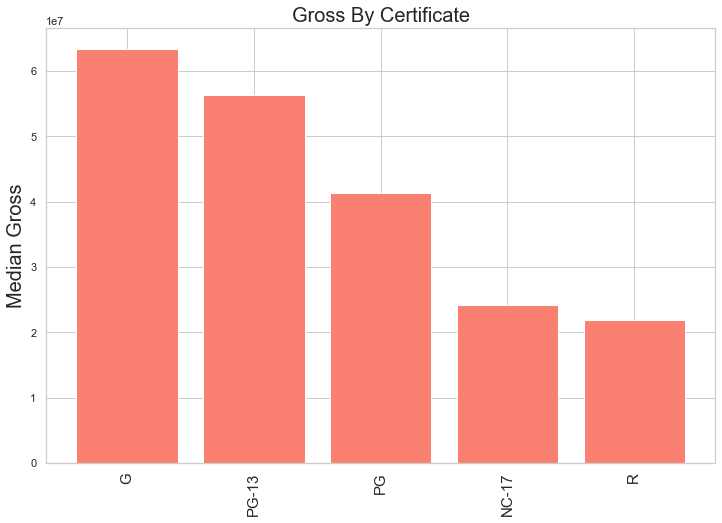

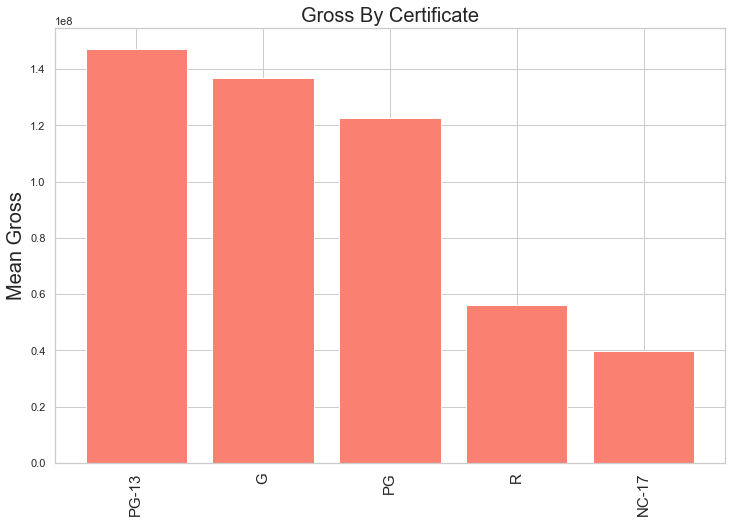

In [314]:
certificate=parseWithMoneyAndCount(data,'ListOfCertificate')
fig=plt.figure(figsize=(12,8))
data2=certificate.sort_values(by='Count',ascending=False)
plt.bar(data=data2,x='ListOfCertificate',height='Count',color="salmon")
plt.xticks(rotation=90,fontsize=15)
plt.ylabel("Count",fontsize=20)
plt.title("Releases By Certificate",fontsize=20)
plt.show()
fig=plt.figure(figsize=(12,8))
data2=certificate.sort_values(by='Median',ascending=False)
plt.bar(data=data2,x='ListOfCertificate',height='Median',color="salmon")
plt.xticks(rotation=90,fontsize=15)
plt.ylabel("Median Gross",fontsize=20)
plt.title("Gross By Certificate",fontsize=20)
plt.show()
fig=plt.figure(figsize=(12,8))
data2=certificate.sort_values(by='Mean',ascending=False)
plt.bar(data=data2,x='ListOfCertificate',height='Mean',color="salmon")
plt.xticks(rotation=90,fontsize=15)
plt.ylabel("Mean Gross",fontsize=20)
plt.title("Gross By Certificate",fontsize=20)
plt.show()

NC-17 has the least numbers of release

PG-13 and G has higher mean and medians gross
R and NC-27 has low mean and median gross
This is understandable since R and NC-27 will reduces the age can watch the film. Hence lower!

In [315]:
certificate

,ListOfCertificate,Total,Count,Mean,Median
0,G,25311167254,185,1.368171e+08,63456988.0
1,NC-17,755519496,19,3.976418e+07,24152155.0
2,PG,134940788389,1100,1.226734e+08,41361379.5
3,PG-13,266649426461,1810,1.473201e+08,56332230.5
4,R,145322456967,2585,5.621758e+07,21947454.0


Conduct rank by Certificate

By Mean

In [316]:
certificate=certificate.sort_values(by='Mean',ascending=True).reset_index(drop=True)
cerRank=dict()
for i, row in enumerate(certificate['ListOfCertificate']):
    cerRank[row]=i
cerRank

{'NC-17': 0, 'R': 1, 'PG': 2, 'G': 3, 'PG-13': 4}

Pearsons correlation between cerRank and Gross: 0.214


<AxesSubplot:xlabel='cerRank', ylabel='Gross_worldwide'>

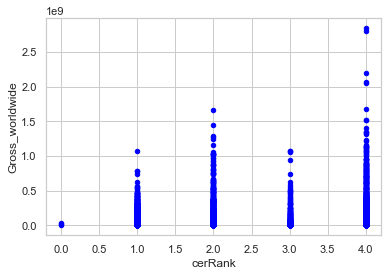

In [317]:
def getCerRank(cers):
    max=0
    for cer in cers:
        if cer not in cerRank.keys():
            continue
        if cerRank[cer]>max:
            max=cerRank[cer]
    return max
data2=data.copy()
data2['cerRank']=data2['ListOfCertificate'].apply(getCerRank)
corr= pearsonr(data2['cerRank'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between cerRank and Gross: %.3f' % corr)
data2.plot.scatter(x='cerRank',y='Gross_worldwide',color='blue')

In [318]:
final['cerRank']=data2['cerRank']

In [319]:
final.to_csv('../dataset/extracted/feature_extracted.csv',index=False)